<a href="https://colab.research.google.com/github/Sonia-devi/Bank-App/blob/main/classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_excel(r"/content/transformed dataset 1.xlsx")


In [3]:
df.head()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
0,1,1,0,1,102.0,1.84,30.127599,1.0,5000.0,1.0,...,0,1,0,1.0,0.0,0,0.0,0.0,0,2
1,3,1,0,1,82.7,1.78,26.101502,1.0,4200.0,1.0,...,0,0,0,0.0,1.0,3,0.0,0.0,3,1
2,1,1,0,1,80.0,2.00,20.000000,1.0,6100.0,4.0,...,0,0,0,0.0,0.0,0,3.0,1.0,3,1
3,1,1,0,1,80.0,1.75,26.122449,1.0,6000.0,4.0,...,0,0,0,0.0,0.0,0,1.0,1.0,0,2
4,0,1,0,1,89.0,1.78,28.089888,1.0,1000.0,2.0,...,1,0,0,1.0,1.0,0,3.0,1.0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age Group                          295 non-null    int64  
 1   Handedness                         295 non-null    int64  
 2   Gender                             295 non-null    int64  
 3   Job Function                       295 non-null    int64  
 4   Weight                             291 non-null    float64
 5   Height                             289 non-null    float64
 6   BMI                                287 non-null    float64
 7   Aviation Sector                    291 non-null    float64
 8   Flight Hours                       166 non-null    float64
 9   Flight Type                        205 non-null    float64
 10  Bed Time                           294 non-null    float64
 11  Sleep Latency                      294 non-null    float64

In [5]:
df.tail()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
290,0,1,0,5,105.0,1.88,29.708013,4.0,NaN,NaN,...,3,0,0,1.0,0.0,1,2.0,0.0,2,0
291,1,1,0,3,60.0,1.66,21.773842,4.0,NaN,NaN,...,0,0,0,0.0,1.0,0,2.0,0.0,0,2
292,2,0,0,2,100.0,1.90,27.700831,4.0,NaN,NaN,...,0,1,0,0.0,0.0,3,3.0,0.0,3,2
293,2,1,1,3,72.0,1.67,25.816630,4.0,NaN,NaN,...,0,0,1,0.0,1.0,0,0.0,0.0,3,2
294,3,1,0,3,90.0,1.78,28.405504,4.0,NaN,NaN,...,0,0,0,0.0,0.0,0,1.0,0.0,0,2


In [6]:
df.shape

(295, 28)

In [7]:
#finding the duplicate values
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

if initial_rows == final_rows:
  print("No Duplicate Values Found.")
else:
  print("Duplicate Values Found and Dropped")

#Handle missing values, if any
if df.isnull().sum().sum() == 0:
  print("No Missing Values Found.")
else:
  print("Missing Values Found and Handled.")

No Duplicate Values Found.
Missing Values Found and Handled.


In [8]:
#Due to missing values (NaN), I performed "Imputation" which enabled me to fill in missing values with estimated values and I did this due to the size of my dataset, because if I had dropped the columns with Null (NaN) values it would reduce my dataset drastically.

df_2= df.fillna(df.mean())

df_2

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
0,1,1,0,1,102.0,1.84,30.127599,1.0,5000.000000,1.000000,...,0,1,0,1.0,0.0,0,0.0,0.0,0,2
1,3,1,0,1,82.7,1.78,26.101502,1.0,4200.000000,1.000000,...,0,0,0,0.0,1.0,3,0.0,0.0,3,1
2,1,1,0,1,80.0,2.00,20.000000,1.0,6100.000000,4.000000,...,0,0,0,0.0,0.0,0,3.0,1.0,3,1
3,1,1,0,1,80.0,1.75,26.122449,1.0,6000.000000,4.000000,...,0,0,0,0.0,0.0,0,1.0,1.0,0,2
4,0,1,0,1,89.0,1.78,28.089888,1.0,1000.000000,2.000000,...,1,0,0,1.0,1.0,0,3.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0,1,0,5,105.0,1.88,29.708013,4.0,7755.638554,2.263415,...,3,0,0,1.0,0.0,1,2.0,0.0,2,0
291,1,1,0,3,60.0,1.66,21.773842,4.0,7755.638554,2.263415,...,0,0,0,0.0,1.0,0,2.0,0.0,0,2
292,2,0,0,2,100.0,1.90,27.700831,4.0,7755.638554,2.263415,...,0,1,0,0.0,0.0,3,3.0,0.0,3,2
293,2,1,1,3,72.0,1.67,25.816630,4.0,7755.638554,2.263415,...,0,0,1,0.0,1.0,0,0.0,0.0,3,2


In [9]:
# Initialize the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')


In [10]:
df_2.tail()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
290,0,1,0,5,105.0,1.88,29.708013,4.0,7755.638554,2.263415,...,3,0,0,1.0,0.0,1,2.0,0.0,2,0
291,1,1,0,3,60.0,1.66,21.773842,4.0,7755.638554,2.263415,...,0,0,0,0.0,1.0,0,2.0,0.0,0,2
292,2,0,0,2,100.0,1.90,27.700831,4.0,7755.638554,2.263415,...,0,1,0,0.0,0.0,3,3.0,0.0,3,2
293,2,1,1,3,72.0,1.67,25.816630,4.0,7755.638554,2.263415,...,0,0,1,0.0,1.0,0,0.0,0.0,3,2
294,3,1,0,3,90.0,1.78,28.405504,4.0,7755.638554,2.263415,...,0,0,0,0.0,0.0,0,1.0,0.0,0,2


In [11]:
df_2.describe() #(calculating some statistical data like percentile, mean and std of the numerical values )

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,...,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,1.884746,0.894915,0.233898,2.423729,81.473952,1.763744,26.151228,1.439863,7755.638554,2.263415,...,0.220339,0.294915,0.386441,0.795222,0.649660,0.552542,0.955631,0.299320,1.755932,1.674576
std,1.121954,0.394444,0.431975,1.812686,16.806353,0.088335,4.826239,0.811687,3961.099000,1.039649,...,0.635348,0.776663,0.773599,1.087519,0.974007,0.923863,1.178641,0.694144,1.027558,0.734845
min,0.000000,0.000000,0.000000,1.000000,52.000000,1.500000,17.577069,1.000000,56.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,71.000000,1.700000,23.315049,1.000000,6050.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,80.000000,1.780000,25.816630,1.000000,7755.638554,2.263415,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,3.000000,1.000000,0.000000,4.000000,90.000000,1.830000,27.755102,2.000000,8000.000000,2.263415,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,2.000000
max,5.000000,2.000000,2.000000,6.000000,190.000000,2.000000,65.743945,5.000000,22000.000000,6.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [12]:
df_2.sample(frac=0.5) # (get a subset of random rows or columns)

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
239,2,1,1,3,80.2,1.70,27.750865,2.0,7755.638554,2.263415,...,0,0,0,0.0,1.0,1,1.0,3.0,2,1
166,3,1,1,2,98.0,1.63,36.885092,2.0,7755.638554,2.263415,...,0,0,0,0.0,1.0,0,0.0,0.0,0,1
64,1,1,0,1,76.0,1.76,24.535124,1.0,1800.000000,4.000000,...,0,0,0,0.0,0.0,0,1.0,0.0,3,2
99,2,1,0,1,60.0,1.72,20.281233,1.0,8974.000000,4.000000,...,1,0,0,0.0,1.0,0,0.0,0.0,0,2
247,0,1,1,6,52.0,1.60,20.312500,1.0,7755.638554,1.000000,...,1,0,3,3.0,3.0,0,3.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3,1,0,1,88.0,1.80,27.160494,1.0,9000.000000,2.000000,...,0,0,0,0.0,0.0,0,0.0,0.0,2,2
35,1,1,0,1,76.0,1.72,25.689562,1.0,7900.000000,5.000000,...,0,0,1,1.0,1.0,0,3.0,1.0,2,1
280,3,1,0,6,90.0,1.78,28.405504,1.0,7755.638554,2.263415,...,3,2,0,0.0,0.0,0,2.0,0.0,3,1
110,2,0,0,1,100.0,1.85,29.218408,1.0,8000.000000,1.000000,...,1,3,1,1.0,2.0,1,2.0,1.0,2,0


In [13]:
sample_data = df_2.sample(frac=0.05)

In [14]:
sample_data.describe()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.733333,0.866667,0.266667,2.066667,81.000000,1.749583,26.295090,1.600000,7182.255422,2.154472,...,0.266667,0.333333,0.333333,1.200000,0.666667,0.466667,1.133333,0.200000,1.533333,1.933333
std,0.961150,0.351866,0.457738,1.579632,13.304135,0.091802,2.708004,1.055597,3942.512634,0.265789,...,0.798809,0.816497,0.487950,1.082326,0.816497,0.516398,1.125463,0.414039,0.990430,0.593617
min,0.000000,0.000000,0.000000,1.000000,70.000000,1.600000,23.671254,1.000000,1600.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,1.000000,72.500000,1.685000,24.370351,1.000000,4350.000000,2.000000,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,2.000000,1.000000,0.000000,1.000000,77.000000,1.740000,25.816630,1.000000,7755.638554,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,2.500000,1.000000,0.500000,3.000000,85.000000,1.800000,27.297319,2.000000,7755.638554,2.263415,...,0.000000,0.000000,1.000000,1.500000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000
max,3.000000,1.000000,1.000000,6.000000,123.000000,1.900000,34.072022,4.000000,15000.000000,3.000000,...,3.000000,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000


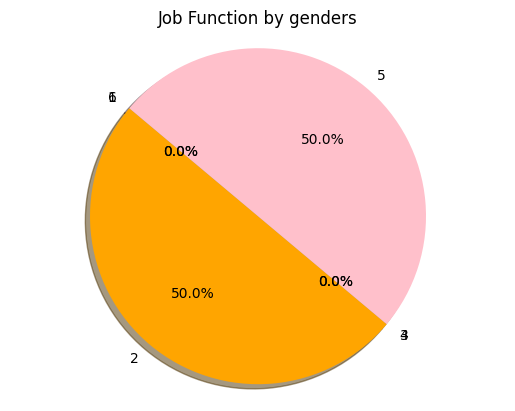

In [15]:
from matplotlib import pyplot as plt
job_functions = [1,2,3,4,5,6 ]
genders = [0,1,0,0,1,0]
colors = ['yellow', 'orange', 'lightblue', 'lightgreen','pink', 'blue']

plt.pie(genders, labels=job_functions, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures the pie chart is circular.
plt.axis('equal')

# Add a title
plt.title('Job Function by genders')

# Display the pie chart
plt.show()

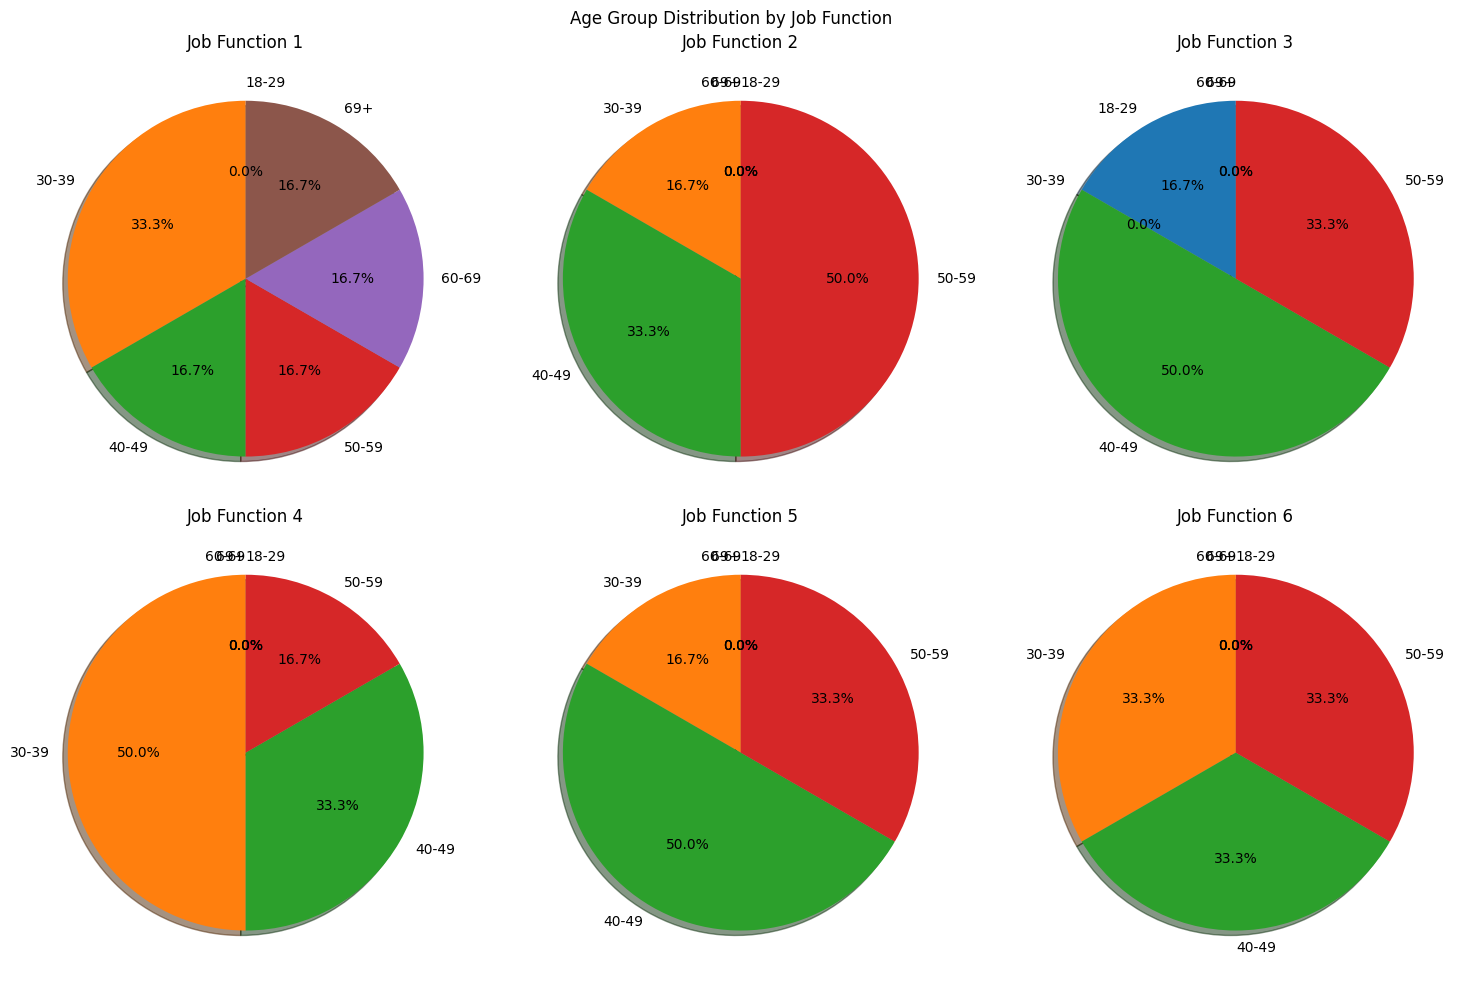

In [ ]:
 #Sample data
job_functions = [1, 2, 3, 4, 5, 6]  #  job function categories (integers)
age_groups = {
    1: [1, 2, 4, 3, 1, 5],  # age groups for each job function
    2: [1, 3, 2, 2, 3, 3],
    3: [0, 2, 2, 3, 2, 3],
    4: [1, 3, 2, 2, 1, 1],
    5: [1, 2, 2, 3, 2, 3],
    6: [1, 2, 3, 2, 1, 3]
}

# Categorize age groups into bins or ranges
age_bins = ['18-29', '30-39', '40-49', '50-59', '60-69', '69+']
age_categories = {}
for job_function, ages in age_groups.items():
    age_categories[job_function] = []
    for age in ages:
        if age == 5:
            age_categories[job_function].append('69+')
        elif age == 4:
            age_categories[job_function].append('60-69')
        elif age == 3:
            age_categories[job_function].append('50-59')
        elif age == 2:
            age_categories[job_function].append('40-49')
        elif age == 1:
            age_categories[job_function].append('30-39')
        else:
            age_categories[job_function].append('18-29')

# Count the number of occurrences of each age group category for each job function
age_counts = {job_function: [age_categories[job_function].count(category) for category in age_bins] for job_function in job_functions}

# Create the pie charts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Age Group Distribution by Job Function')

for i, job_function in enumerate(job_functions):
    row = i // 3
    col = i % 3


    axes[row, col].pie(age_counts[job_function], labels=age_bins, autopct='%1.1f%%', startangle=90, shadow=True)
    axes[row, col].set_title(f'Job Function {job_function}')

plt.tight_layout()
plt.show()

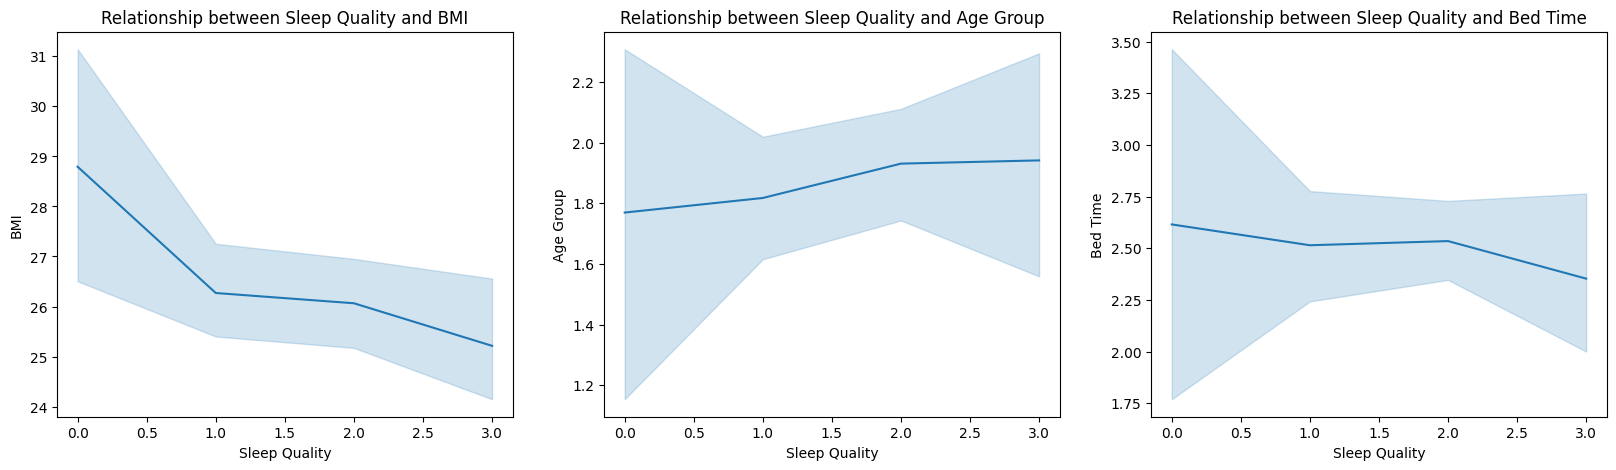

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your dataset loaded into a DataFrame named 'df'

# Define the order of 'Sleep Quality' for proper plotting
sleep_quality_order = [0, 1, 2, 3]

# Set the 'Sleep Quality' column as a categorical variable with the specified order
df['Sleep Quality'] = pd.Categorical(df['Sleep Quality'], categories=sleep_quality_order, ordered=True)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot the line plots with the specified order
sns.lineplot(ax=axes[0], x='Sleep Quality', y='BMI', data=df)
sns.lineplot(ax=axes[1], x='Sleep Quality', y='Age Group', data=df)
sns.lineplot(ax=axes[2], x='Sleep Quality', y='Bed Time', data=df)

axes[0].set_title('Relationship between Sleep Quality and BMI')
axes[1].set_title('Relationship between Sleep Quality and Age Group')
axes[2].set_title('Relationship between Sleep Quality and Bed Time')

plt.show()


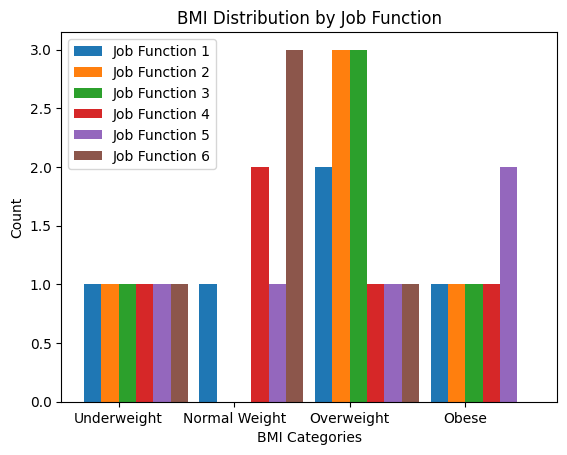

In [ ]:
# Sample data
job_functions = [1, 2, 3, 4, 5, 6]  # job function categories (integers)
bmi_values = {
    1: [30.12759924, 26.10150234, 20, 26.12244898],
    2: [26.6727633, 26.36560303, 25.71219869, 32.54800084],
    3: [25.14741589, 26.84061047, 27.04164413, 30.66890496],
    4: [23.32341806, 24.85836513, 33.24083709, 26.26494385],
    5: [23.87543253, 33.15988164, 25.71219869, 45.76442368],
    6: [22.49858277, 19.56823633, 22.03856749, 25.95155709]
}

# Categorize BMI values into bins
bmi_bins = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
bmi_categories = {}
for job_function, values in bmi_values.items():
    bmi_categories[job_function] = []
    for bmi in values:
        if bmi < 18.0:
            bmi_categories[job_function].append('Underweight')
        elif 18.0 <= bmi < 25.0:
            bmi_categories[job_function].append('Normal Weight')
        elif 25.0 <= bmi < 30.0:
            bmi_categories[job_function].append('Overweight')
        else:
            bmi_categories[job_function].append('Obese')

    # Check if the 'Underweight' category is missing and add it with a count of 0
    if 'Underweight' not in bmi_categories[job_function]:
        bmi_categories[job_function].append('Underweight')

# Count the number of occurrences of each BMI category for each job function
bmi_counts = {job_function: [bmi_categories[job_function].count(category) for category in bmi_bins] for job_function in job_functions}

# Create the bar graphs
width = 0.15
x = range(len(bmi_bins))
num_job_functions = len(job_functions)
color_map = plt.get_cmap('tab10')  # Use tab10 color map for more than 6 job functions

fig, ax = plt.subplots()

for i, job_function in enumerate(job_functions):
    color = color_map(i % num_job_functions)  # Get the color based on the job function index
    ax.bar([pos + i * width for pos in x], bmi_counts[job_function], width=width, label=f'Job Function {job_function}', color=color)

ax.set_xticks([pos + 1.5 * width for pos in x])
ax.set_xticklabels(bmi_bins)
ax.set_xlabel('BMI Categories')
ax.set_ylabel('Count')
ax.set_title('BMI Distribution by Job Function')
ax.legend()

plt.show()




In [16]:
# Define the feature columns (X) excluding the target variable ('Sleep Quality')
feature_columns = ['Age Group', 'Handedness', 'Gender', 'Job Function', 'Weight', 'Height', 'BMI', 'Aviation Sector',
                   'Flight Hours', 'Flight Type', 'Bed Time', 'Sleep Latency', 'Wake Time', 'Sleep Duration',
                   'Bed Duration', 'Sleep Inability', 'WASO Problems', 'Bathroom Problems', 'Breathing Difficulties',
                   'Cough and/or snoring', 'Cold difficulties', 'Hot difficulties', 'Bad dreams', 'Pain difficulties',
                   'Other difficulties', 'Social Activity Sleepiness', 'Sustained Enthusiasm Difficulties']
 # Create the feature DataFrame (X)
X = df[feature_columns]


In [33]:
# Create the feature DataFrame (X)
X = df[feature_columns]
# Create the target variable Series (y)
y = df['Sleep Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Fit and transform the imputer on the training data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# Create and train the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
#train the model on traing data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model on the test data
accuracy = rf_model.score(X_test, y_test)
print(f"Accuracy of the RandomForestClassifier: {accuracy}")

Accuracy of the RandomForestClassifier: 0.5932203389830508


In [ ]:

# Predict the target values on the test set
y_pred = rf_model.predict(X_test)

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.63      0.52      0.57        23
           2       0.59      0.77      0.67        30
           3       0.00      0.00      0.00         4

    accuracy                           0.59        59
   macro avg       0.31      0.32      0.31        59
weighted avg       0.55      0.59      0.56        59



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
## Optionally, scale the data (recommended for SVM with RBF kernel)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (linear, rbf, etc.)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predict the target values on the test set
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM: {accuracy:.2f}')

Accuracy of SVM: 0.58


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [ ]:
# Optionally, scale the data (recommended for ANNs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification (0 or 1)


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


In [ ]:
# Train the model on the training data with early stopping
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Increase the number of epochs and batch size
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64,
                    validation_split=0.1, callbacks=[early_stop], verbose=1)


Epoch 1/100
4/4 [==============================] - 3s 133ms/step - loss: 0.7740 - accuracy: 0.1698 - val_loss: -0.0079 - val_accuracy: 0.2917
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0468 - accuracy: 0.3066 - val_loss: -0.8196 - val_accuracy: 0.2917
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: -0.6215 - accuracy: 0.3491 - val_loss: -1.5601 - val_accuracy: 0.2917
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: -1.2203 - accuracy: 0.3491 - val_loss: -2.2777 - val_accuracy: 0.2917
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: -1.8139 - accuracy: 0.3491 - val_loss: -3.0496 - val_accuracy: 0.2917
Epoch 6/100
4/4 [==============================] - 0s 29ms/step - loss: -2.4515 - accuracy: 0.3491 - val_loss: -3.9063 - val_accuracy: 0.2917
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: -2.9675 - accuracy: 0.3491 - val_loss: -4.8662 - val_accuracy: 0.2917
Epoch 8

In [ ]:
# Evaluate the model on the test data
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

2/2 [==============================] - 0s 10ms/step


In [ ]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of ANN: {accuracy:.2f}')

Accuracy of ANN: 0.39


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Create individual classifiers
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
nn_model = MLPClassifier(random_state=42)

In [ ]:
# Create a Voting Classifier with the individual classifiers
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', svm_model),
    ('nn', nn_model)
], voting='hard')  # 'hard' means majority voting, 'soft' means weighted voting based on probabilities

In [ ]:
# Train the ensemble model on the training data
ensemble_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(kernel='linear', random_state=42)),
                             ('nn', MLPClassifier(random_state=42))])

In [ ]:
# Predict the target values on the test set using the ensemble model
y_pred = ensemble_model.predict(X_test_scaled)

In [ ]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Ensemble Model: {accuracy:.2f}')

Accuracy of Ensemble Model: 0.61


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [21]:
# Optionally, scale the data (recommended for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300,500,1000,10000],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    }

In [34]:
# Create the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

In [35]:
# Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500, 1000, 10000]})

In [36]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [37]:
# Create and train the final Random Forest Classifier model with the best hyperparameters
rf_model_final = RandomForestClassifier(random_state=42, **best_params)
rf_model_final.fit(X_train_scaled, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=10000,
                       random_state=42)

In [38]:
# Predict the target values on the test set
y_pred = rf_model_final.predict(X_test_scaled)

In [39]:
 # Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')

Accuracy of Random Forest Classifier: 0.66
